# Load Data

In [2]:
import music21
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import mnet

Create path to access local files

In [3]:
'''
Creat local corpus with access pieces
'''

localCorpus = music21.corpus.corpora.LocalCorpus()
localCorpus.addPath('../library')
music21.corpus.cacheMetadata()

/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: local metadata cache: starting processing of paths: 2
/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /var/folders/j6/2q7hftds7vb8_lsfy50l8lzw0000gn/T/music21/local.p.gz
bundles.py: WARNING: MetadataBundle Modification Time: 1595868182.474329
bundles.py: WARNING: Skipped 2 sources already in cache.
/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: writing time: 0.013 md items: 2

/opt/anaconda3/lib/python3.7/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /var/folders/j6/2q7hftds7vb8_lsfy50l8lzw0000gn/T/music21/local.p.gz
caching.py: WARNING: cache: final writing time: 0.014 seconds


Save Fur Elise

In [4]:
s = music21.corpus.parse('beethoven_fur_elise.xml')

In [4]:
s.show("text")

{0.0} <music21.text.TextBox "Fur Elise ...">
{0.0} <music21.text.TextBox "Beethoven">
{0.0} <music21.text.TextBox "public dom...">
{0.0} <music21.text.TextBox "2">
{0.0} <music21.text.TextBox "3">
{0.0} <music21.text.TextBox "4">
{0.0} <music21.metadata.Metadata object at 0xa22eb3c90>
{0.0} <music21.stream.PartStaff P1-Staff1>
    {0.0} <music21.instrument.Instrument 'P1: Piano: Piano (2)'>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.layout.PageLayout>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.layout.StaffLayout distance None, staffNumber 1, staffSize None, staffLines None>
        {0.0} <music21.bar.Repeat direction=start>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.tempo.MetronomeMark andantino Eighth=80.0>
        {0.0} <music21.key.Key of C major>
        {0.0} <music21.meter.TimeSignature 3/8>
        {0.0} <music21.note.Note E>
        {0.25} <music21.note.Note D#>
    {0.0} <music21.spanner.RepeatBracket 1 <m

## Basic encoding - function from server.py

In [5]:
def convert_basic(lst):
    nodelst=[]
    convert_note = lambda x: x.name+str(x.octave)
    for note in lst:
        node=note
        if type(note) == music21.chord.Chord :
            node = convert_note(max(note.pitches))
        elif type(note) == music21.note.Note:
            node = convert_note(note)
        else:
            print("ERROR UNHANDLED TYPE ", type(note))
        nodelst.append(node)
            
    pitchdict = dict((zip(nodelst, nodelst)))
    return nodelst, pitchdict

In [6]:
def make_basic_graph_from_file(filename):
    s = music21.corpus.parse(filename)
    for section in s:
        t=type(section)
        print(t)
        if t == music21.stream.Part or t == music21.stream.PartStaff:
            topline = section
            break
            #ideally throw error if there is no part, need to reupload file
    topline_notes =list(topline.recurse().notes)
    nodelst_basic, pitchdict =convert_basic(topline_notes)
    g_basic=mnet.create_graph(nodelst_basic)
 
    return g_basic, pitchdict

In [7]:
make_basic_graph_from_file('beethoven_fur_elise.xml')

<class 'music21.text.TextBox'>
<class 'music21.text.TextBox'>
<class 'music21.text.TextBox'>
<class 'music21.text.TextBox'>
<class 'music21.text.TextBox'>
<class 'music21.text.TextBox'>
<class 'music21.metadata.Metadata'>
<class 'music21.stream.PartStaff'>


(<networkx.classes.multidigraph.MultiDiGraph at 0xa23904250>,
 {'E5': 'E5',
  'D#5': 'D#5',
  'B4': 'B4',
  'D5': 'D5',
  'C5': 'C5',
  'A4': 'A4',
  'C4': 'C4',
  'E4': 'E4',
  'G#4': 'G#4',
  'G4': 'G4',
  'F5': 'F5',
  'F4': 'F4',
  'E6': 'E6',
  'B-5': 'B-5',
  'A5': 'A5',
  'G5': 'G5',
  'B-4': 'B-4',
  'C6': 'C6',
  'B5': 'B5',
  'C#5': 'C#5',
  'E-5': 'E-5',
  'A3': 'A3',
  'D6': 'D6',
  'A6': 'A6',
  'C7': 'C7',
  'E7': 'E7',
  'A7': 'A7',
  'C8': 'C8',
  'E8': 'E8',
  'D8': 'D8',
  'B7': 'B7',
  'B-7': 'B-7',
  'G#7': 'G#7',
  'G7': 'G7',
  'F#7': 'F#7',
  'F7': 'F7',
  'D#7': 'D#7',
  'D7': 'D7',
  'C#6': 'C#6',
  'G#5': 'G#5',
  'F#5': 'F#5'})

## Group Encoding  - testing for server.py

In [19]:
def convert_grouping(lst, grouping):
    convert_note = lambda x: x.name+str(x.octave)
    pitchdict = {}
    nodelst=[] #list to store nodes
    #add first node
    transition_lst=[]
    i=0
    g=0
    node_group=grouping[g]
    while i < len(lst):
        note = lst[i]
        if type(note) == music21.chord.Chord :
            node_id = convert_note(max(note.pitches))
        elif type(note) == music21.note.Note:
            node_id = convert_note(note)
        else:
            print("ERROR UNHANDLED TYPE ", type(note))

        #print(getMeasureFromNote(note))
        if mnet.getMeasureFromNote(note) == str(grouping[g]):
            node_group = grouping[g]
            g+=1
            if i !=0:
                transition_lst.append((nodelst[i-1],\
                     str(node_group)+"_"+str(node_id)))
        node = str(node_group)+"_"+str(node_id)
        nodelst.append(node)
        pitchdict[node]= str(node_id)
        i +=1
    return nodelst, transition_lst, pitchdict

In [24]:
def make_grouped_graph_from_file(filename, grouping):
    s = music21.corpus.parse(filename)
    for section in s:
        t=type(section)
        print(t)
        if t == music21.stream.Part or t == music21.stream.PartStaff:
            topline = section
            break
            #ideally throw error if there is no part, need to reupload file
    topline_notes =list(topline.recurse().notes)
    nodelst_grouped, transition_lst, pitchdict =convert_grouping(topline_notes, grouping)
    g_group=mnet.create_graph(nodelst_grouped)
 

    return g_group, pitchdict


In [25]:
make_grouped_graph_from_file('beethoven_fur_elise.xml', [1, 5, 11, 27, 37, 49, 61, 75, "end"])

<class 'music21.text.TextBox'>
<class 'music21.text.TextBox'>
<class 'music21.text.TextBox'>
<class 'music21.text.TextBox'>
<class 'music21.text.TextBox'>
<class 'music21.text.TextBox'>
<class 'music21.metadata.Metadata'>
<class 'music21.stream.PartStaff'>


(<networkx.classes.multidigraph.MultiDiGraph at 0xa23204710>,
 {'1_E5': 'E5',
  '1_D#5': 'D#5',
  '1_B4': 'B4',
  '1_D5': 'D5',
  '1_C5': 'C5',
  '1_A4': 'A4',
  '1_C4': 'C4',
  '1_E4': 'E4',
  '1_G#4': 'G#4',
  '5_C5': 'C5',
  '5_E4': 'E4',
  '5_E5': 'E5',
  '5_D#5': 'D#5',
  '5_B4': 'B4',
  '5_D5': 'D5',
  '5_A4': 'A4',
  '5_C4': 'C4',
  '11_E5': 'E5',
  '11_G4': 'G4',
  '11_F5': 'F5',
  '11_D5': 'D5',
  '11_F4': 'F4',
  '11_C5': 'C5',
  '11_E4': 'E4',
  '11_B4': 'B4',
  '11_E6': 'E6',
  '11_D#5': 'D#5',
  '11_A4': 'A4',
  '11_C4': 'C4',
  '11_G#4': 'G#4',
  '27_E5': 'E5',
  '27_D5': 'D5',
  '27_B-5': 'B-5',
  '27_A5': 'A5',
  '27_G5': 'G5',
  '27_F5': 'F5',
  '27_C5': 'C5',
  '27_B-4': 'B-4',
  '27_A4': 'A4',
  '27_G4': 'G4',
  '27_D#5': 'D#5',
  '27_B4': 'B4',
  '27_C6': 'C6',
  '27_B5': 'B5',
  '37_E5': 'E5',
  '37_F5': 'F5',
  '37_D#5': 'D#5',
  '37_B4': 'B4',
  '37_D5': 'D5',
  '37_C5': 'C5',
  '37_A4': 'A4',
  '37_C4': 'C4',
  '37_E4': 'E4',
  '37_G#4': 'G#4',
  '49_E5': 'E5',


Convert Annotated Version into chords

In [ ]:
def convert_basic(lst):

        convert_note = lambda x: x.name+str(x.octave)
        nodelst = list(map(convert_note, lst))
        pitchdict = dict((zip(nodelst, nodelst)))
        return nodelst, pitchdict

In [5]:
chords = s.chordify().recurse().notes

In [1]:
chords.show("text")

NameError: name 'chords' is not defined

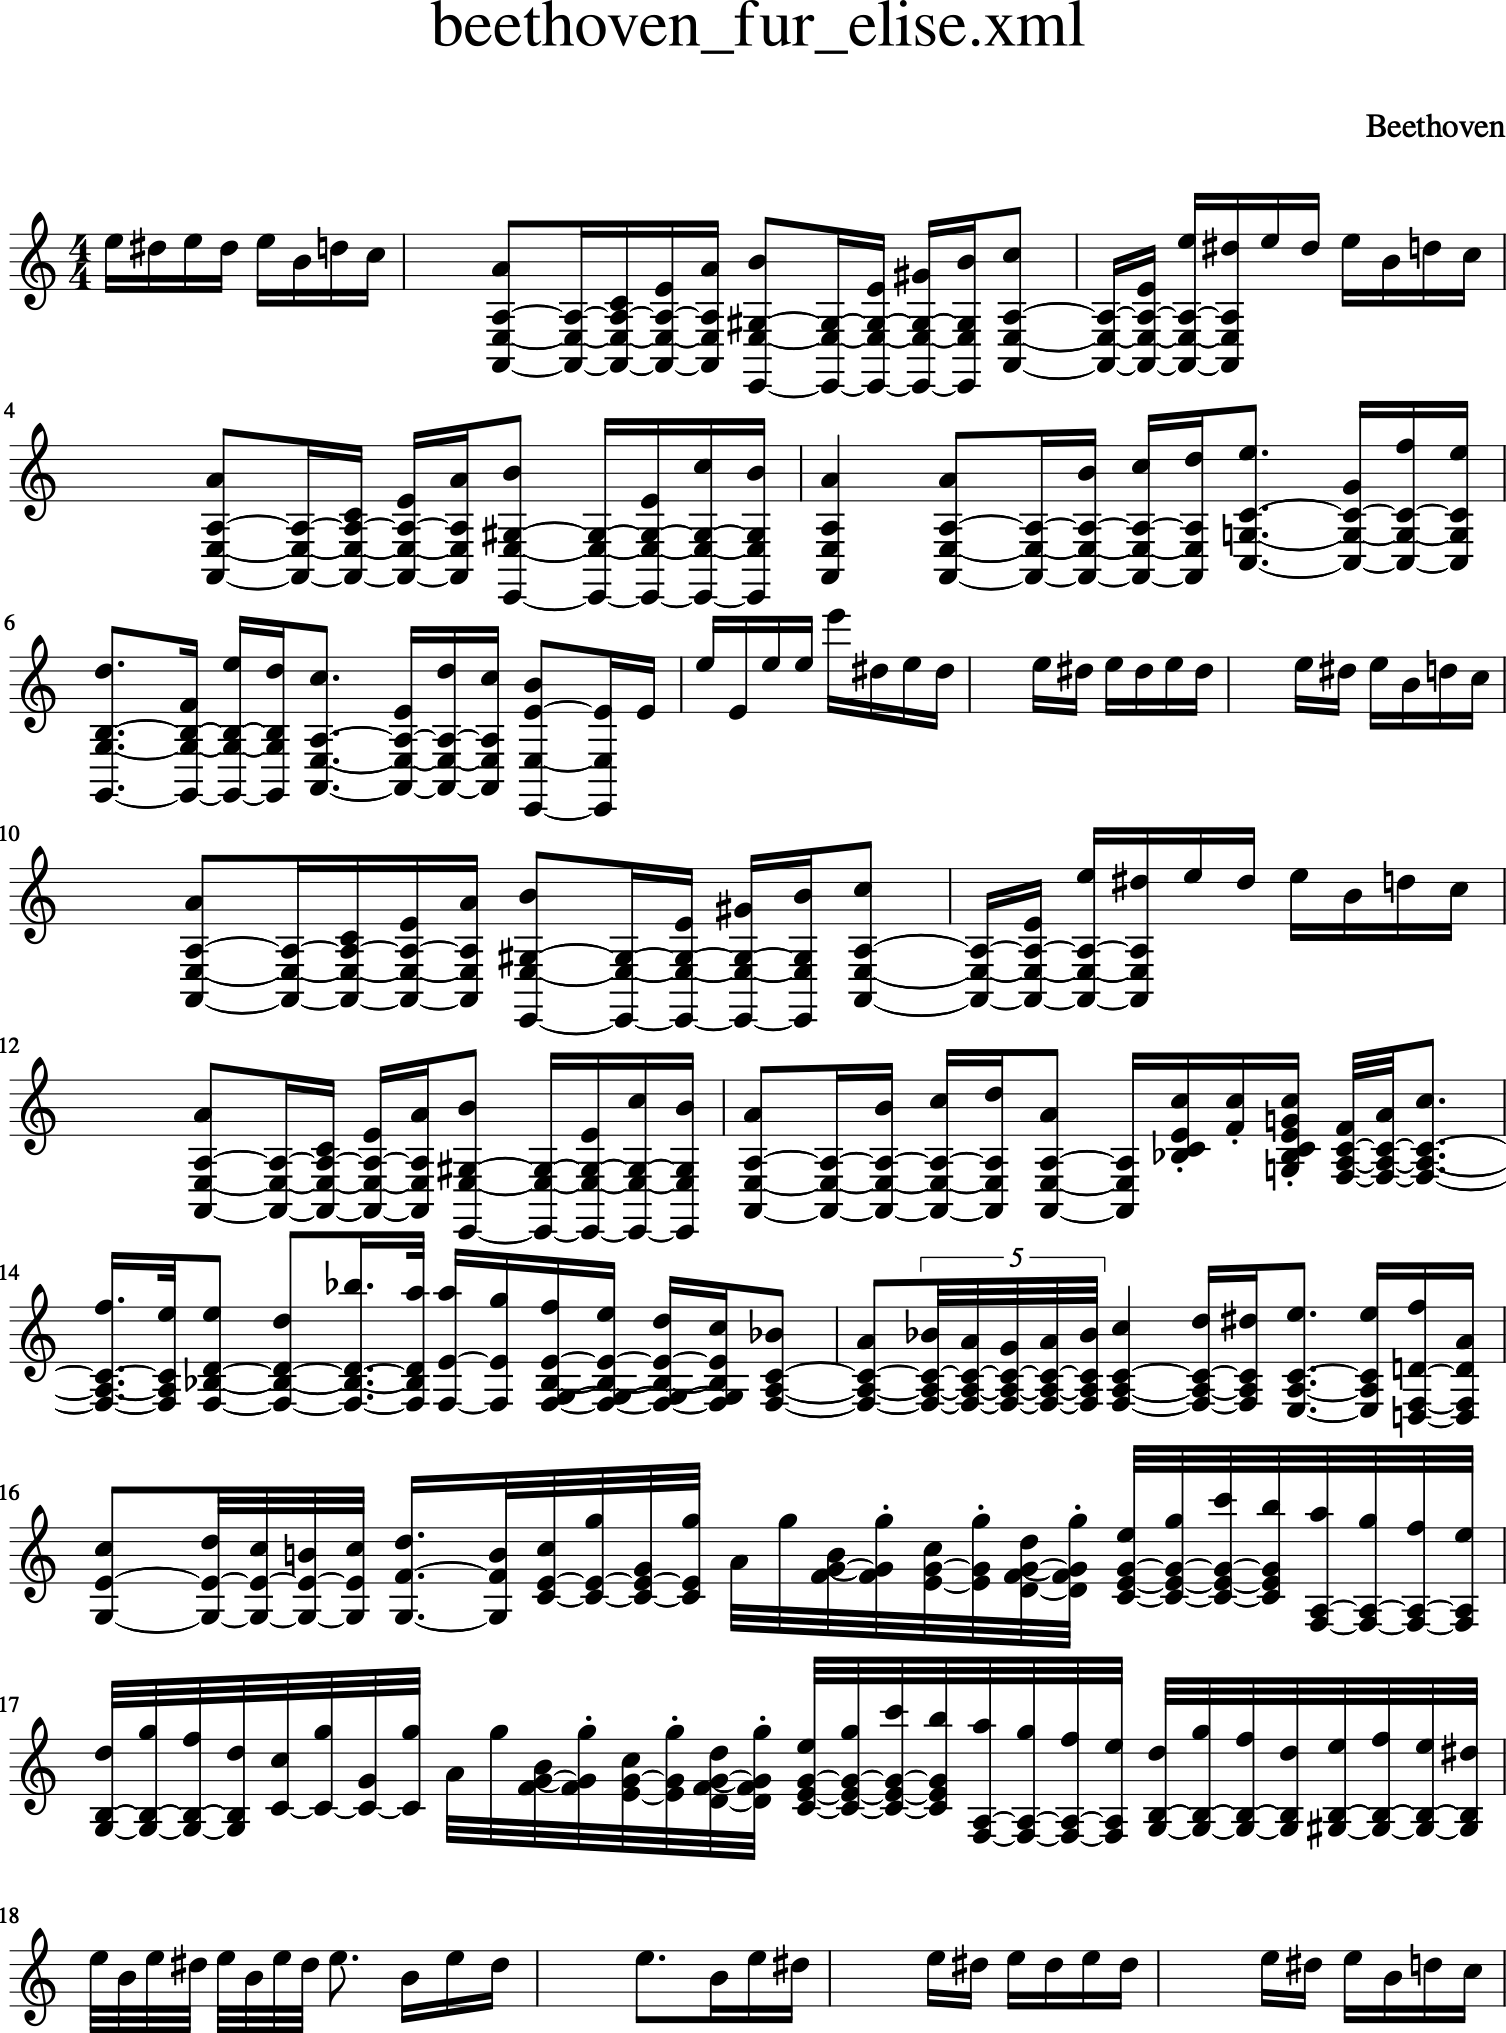

In [6]:
chords.show()

In [7]:
chord_lst = list(chords)

In [8]:
c=chord_lst[1]

In [9]:
c.pitches

(<music21.pitch.Pitch D#5>,)

In [10]:
print(chord_lst)

[<music21.chord.Chord E5>, <music21.chord.Chord D#5>, <music21.chord.Chord E5>, <music21.chord.Chord D#5>, <music21.chord.Chord E5>, <music21.chord.Chord B4>, <music21.chord.Chord D5>, <music21.chord.Chord C5>, <music21.chord.Chord A2 E3 A3 A4>, <music21.chord.Chord A2 E3 A3>, <music21.chord.Chord A2 E3 A3 C4>, <music21.chord.Chord A2 E3 A3 E4>, <music21.chord.Chord A2 E3 A3 A4>, <music21.chord.Chord E2 E3 G#3 B4>, <music21.chord.Chord E2 E3 G#3>, <music21.chord.Chord E2 E3 G#3 E4>, <music21.chord.Chord E2 E3 G#3 G#4>, <music21.chord.Chord E2 E3 G#3 B4>, <music21.chord.Chord A2 E3 A3 C5>, <music21.chord.Chord A2 E3 A3>, <music21.chord.Chord A2 E3 A3 E4>, <music21.chord.Chord A2 E3 A3 E5>, <music21.chord.Chord A2 E3 A3 D#5>, <music21.chord.Chord E5>, <music21.chord.Chord D#5>, <music21.chord.Chord E5>, <music21.chord.Chord B4>, <music21.chord.Chord D5>, <music21.chord.Chord C5>, <music21.chord.Chord A2 E3 A3 A4>, <music21.chord.Chord A2 E3 A3>, <music21.chord.Chord A2 E3 A3 C4>, <music2

# Conversion to notes
    This conversion assumes a uniform key of A Major (derived from the piece's key signature) and assigns a roman numeral to each chord

In [11]:
def convert_chord_note(chord_lst, key):
    
    nodelst=[]
    for chord in chord_lst:
        #extract melody
        print(chord.pitches)
        mel = max(chord.pitches)
        print(mel)
        chord.remove(mel)
        if len(chord.pitches)>0:
            rn = music21.roman.romanNumeralFromChord(chord, music21.key.Key(key))
            rn=str(rn).split()[1]
        else:
            rn = "rest"
        nodelst.append(str(mel)+" "+rn)
    return nodelst

In [12]:
nodelst = convert_chord_note(chord_lst, 'C')

(<music21.pitch.Pitch E5>,)
E5
(<music21.pitch.Pitch D#5>,)
D#5
(<music21.pitch.Pitch E5>,)
E5
(<music21.pitch.Pitch D#5>,)
D#5
(<music21.pitch.Pitch E5>,)
E5
(<music21.pitch.Pitch B4>,)
B4
(<music21.pitch.Pitch D5>,)
D5
(<music21.pitch.Pitch C5>,)
C5
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch A4>)
A4
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch A3>)
A3
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch C4>)
C4
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch E4>)
E4
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch A4>)
A4
(<music21.pitch.Pitch E2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch G#3>, <music21.pitch.Pitch B4>)
B4
(<music21.pitch.Pitch E2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch G#3>)
G#3
(<music21.pitch.Pitch E2>, <music21.pitch

(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch B4>)
B4
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch C5>)
C5
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch D5>)
D5
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch A4>)
A4
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch A3>)
A3
(<music21.pitch.Pitch B-3>, <music21.pitch.Pitch C4>, <music21.pitch.Pitch E4>, <music21.pitch.Pitch C5>)
C5
(<music21.pitch.Pitch F4>, <music21.pitch.Pitch C5>)
C5
(<music21.pitch.Pitch G3>, <music21.pitch.Pitch B-3>, <music21.pitch.Pitch C4>, <music21.pitch.Pitch E4>, <music21.pitch.Pitch G4>, <music21.pitch.Pitch C5>)
C5
(<music21.pitch.Pitch F3>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch C4>, <music21.pitch.Pitch F4>)
F4
(<music21.pitch.Pitch F3>, <music21.pitch.Pitch A3>,

(<music21.pitch.Pitch G#3>, <music21.pitch.Pitch B3>, <music21.pitch.Pitch F5>)
F5
(<music21.pitch.Pitch G#3>, <music21.pitch.Pitch B3>, <music21.pitch.Pitch E5>)
E5
(<music21.pitch.Pitch G#3>, <music21.pitch.Pitch B3>, <music21.pitch.Pitch D#5>)
D#5
(<music21.pitch.Pitch E5>,)
E5
(<music21.pitch.Pitch B4>,)
B4
(<music21.pitch.Pitch E5>,)
E5
(<music21.pitch.Pitch D#5>,)
D#5
(<music21.pitch.Pitch E5>,)
E5
(<music21.pitch.Pitch B4>,)
B4
(<music21.pitch.Pitch E5>,)
E5
(<music21.pitch.Pitch D#5>,)
D#5
(<music21.pitch.Pitch E5>,)
E5
(<music21.pitch.Pitch B4>,)
B4
(<music21.pitch.Pitch E5>,)
E5
(<music21.pitch.Pitch D#5>,)
D#5
(<music21.pitch.Pitch E5>,)
E5
(<music21.pitch.Pitch B4>,)
B4
(<music21.pitch.Pitch E5>,)
E5
(<music21.pitch.Pitch D#5>,)
D#5
(<music21.pitch.Pitch E5>,)
E5
(<music21.pitch.Pitch D#5>,)
D#5
(<music21.pitch.Pitch E5>,)
E5
(<music21.pitch.Pitch D#5>,)
D#5
(<music21.pitch.Pitch E5>,)
E5
(<music21.pitch.Pitch D#5>,)
D#5
(<music21.pitch.Pitch E5>,)
E5
(<music21.pitch.Pitch 

(<music21.pitch.Pitch A2>, <music21.pitch.Pitch A4>)
A4
(<music21.pitch.Pitch A2>,)
A2
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch G3>, <music21.pitch.Pitch B-3>, <music21.pitch.Pitch C#5>)
C#5
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch F3>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch D5>)
D5
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch C#3>, <music21.pitch.Pitch E5>)
E5
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch D3>, <music21.pitch.Pitch F5>)
F5
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch G#3>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch F5>)
F5
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch G#3>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch F5>)
F5
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch C3>, <music21.pitch.Pitch E5>)
E5
(<music21.pitch.Pitch D2>, <music21.pitch.Pitch F2>, <music21.pitch.Pitch A2>, <music21.pitch.Pitch D5>)
D5
(<music21.pitch.Pitch D2>, <music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.P

(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch E5>)
E5
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch D#5>)
D#5
(<music21.pitch.Pitch E5>,)
E5
(<music21.pitch.Pitch D#5>,)
D#5
(<music21.pitch.Pitch E5>,)
E5
(<music21.pitch.Pitch B4>,)
B4
(<music21.pitch.Pitch D5>,)
D5
(<music21.pitch.Pitch C5>,)
C5
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch A4>)
A4
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch A3>)
A3
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch C4>)
C4
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch E4>)
E4
(<music21.pitch.Pitch A2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch A4>)
A4
(<music21.pitch.Pitch E2>, <music21.pitch.Pitch E3>, <music21.pitch.Pitch G#3>, 

Create Multiedge Directional Graph

In [13]:
g_rn=mnet.create_graph(nodelst)

#write as .gexf
nx.write_gexf(g_rn, "rn_composition_notechord.gexf")

Run and Save Random Walk

In [14]:
randomwalk=mnet.generate_randomwalk(g_rn)

In [15]:
randomwalk

['E5 rest',
 'B4 rest',
 'D5 rest',
 'C5 rest',
 'A4 vi5',
 'A3 vi5',
 'C4 vi5',
 'E4 vi5',
 'D5 vi5',
 'E5 i5',
 'D5 V',
 'F4 V',
 'E5 V',
 'D5 V',
 'C5 i',
 'G5 i',
 'G4 i',
 'G5 i',
 'G4 i',
 'G5 i',
 'G4 i',
 'G5 i',
 'A4 rest',
 'G5 rest',
 'B4 v2',
 'G5 v2',
 'C5 iii',
 'G5 iii',
 'D5 v43',
 'G5 v43',
 'E5 I',
 'G5 I',
 'A4 rest',
 'G5 rest',
 'B4 v2',
 'G5 v2',
 'C5 iii',
 'G5 iii',
 'D5 v43',
 'G5 v43',
 'E5 I',
 'G5 I',
 'G4 I',
 'G5 I',
 'C6 I',
 'B5 I',
 'A5 IV',
 'G5 IV',
 'F5 IV',
 'E5 IV',
 'D5 V',
 'C5 vi5',
 'B4 iii',
 'E4 iii',
 'E4 rest',
 'E5 rest',
 'D#5 rest',
 'E5 rest',
 'B4 rest',
 'D5 rest',
 'C5 rest',
 'A4 vi5',
 'A3 vi5',
 'C4 vi5',
 'E4 vi5',
 'E5 vi5',
 'D#5 vi5',
 'E5 rest',
 'B4 rest',
 'D5 rest',
 'C5 rest',
 'A4 vi5',
 'A3 vi5',
 'C4 vi5',
 'E4 vi5',
 'A4 vi5',
 'A4 vi5',
 'B4 III#3',
 'C5 vi5',
 'D5 vi5',
 'C5 vi5',
 'A3 vi5',
 'E4 vi5',
 'A4 vi5',
 'A3 vi5',
 'C4 vi5',
 'E4 vi5',
 'A4 vi5',
 'A3 vi5',
 'E4 vi5',
 'E5 vi5',
 'D#5 vi5',
 'E5 rest',
 'D

In [16]:
len(randomwalk)

320

Convert random walk to back to music.

Uses conversion function strto16thnote, which takes a pitch string and converts it to a note with length of 16th note

In [17]:
def str_rn_mel(randomwalk):
    harmlst=[]
    mellst = []
    for node in randomwalk:

        mel = node.split()[0]
        n = music21.note.Note(mel)
        n.duration.quarterLength =.5
        mellst.append(n)
  
    return mellst

In [19]:
melody_list = str_rn_mel(randomwalk)

In [20]:
melody_stream = mnet.convert_to_stream(randomwalk, melody_list)

#Write to MIDI 
file = melody_stream.write('xml', "fur1.xml")


In [ ]:
harmony_stream = mnet.convert_to_stream(randomwalk, harmony_list)

In [ ]:
full=music21.stream.Stream()

In [ ]:
music21.stream.Part

In [ ]:
full.insert(melody_stream)
full.insert(harmony_stream)

In [ ]:
full.write('midi', "fullRomanNumeral.mid")

In [ ]:
full.show("text")

In [ ]:
p1 = music21.stream.Part()